In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load match related data

In [224]:
df_all = pd.read_csv("data/results_2021.csv")
df_all.columns

Index(['match.name', 'match.date', 'match.status', 'match.matchId',
       'match.venue', 'match.utcStartTime', 'match.homeTeamId',
       'match.awayTeamId', 'match.round', 'match.venueLocalStartTime',
       'match.abbr', 'match.twitterHashTag', 'match.homeTeam.name',
       'match.homeTeam.timeZone', 'match.homeTeam.teamId',
       'match.homeTeam.abbr', 'match.homeTeam.nickname', 'match.awayTeam.name',
       'match.awayTeam.timeZone', 'match.awayTeam.teamId',
       'match.awayTeam.abbr', 'match.awayTeam.nickname', 'venue.address',
       'venue.name', 'venue.state', 'venue.timeZone', 'venue.venueId',
       'venue.abbreviation', 'venue.capacity', 'venue.groundDimension',
       'venue.latitude', 'venue.longitude', 'round.name', 'round.year',
       'round.roundId', 'round.abbreviation', 'round.competitionId',
       'round.roundNumber', 'status', 'matchId', 'scoreWorm', 'scoreMap',
       'lastUpdated', 'homeTeamScore.periodScore',
       'homeTeamScore.rushedBehinds', 'homeTeamS

In [225]:
# Remove finals Rounds 24, 25, 26, 26

df_all = df_all[~df_all['round.roundNumber'].isin([24,25,26,27])]


In [226]:
df_all.shape

(198, 75)

In [227]:
df_all.sort_values('match.date', inplace=True)
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [228]:
df_all.tail()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,homeTeamScoreChart.rightPosters,homeTeamScoreChart.rushedBehinds,homeTeamScoreChart.touchedBehinds,awayTeamScoreChart.goals,awayTeamScoreChart.leftBehinds,awayTeamScoreChart.rightBehinds,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds
193,Geelong Cats Vs Melbourne,2021-08-21 09:25:00,CONCLUDED,CD_M20210142305,CD_V30,2021-08-21T09:25:00,CD_T70,CD_T90,CD_R202101423,2021-08-21T19:25:00,...,1,0,0,12,3,2,0,0,4,0
194,Carlton Vs GWS Giants,2021-08-21 09:40:00,CONCLUDED,CD_M20210142303,CD_V190,2021-08-21T09:40:00,CD_T30,CD_T1010,CD_R202101423,2021-08-21T19:40:00,...,0,3,1,12,8,4,0,1,3,1
195,St Kilda Vs Fremantle,2021-08-22 02:15:00,CONCLUDED,CD_M20210142307,CD_V2,2021-08-22T02:15:00,CD_T130,CD_T60,CD_R202101423,2021-08-22T12:15:00,...,0,0,0,6,5,2,1,0,4,1
196,Essendon Vs Collingwood,2021-08-22 05:20:00,CONCLUDED,CD_M20210142304,CD_V40,2021-08-22T05:20:00,CD_T50,CD_T40,CD_R202101423,2021-08-22T15:20:00,...,1,0,0,9,4,2,1,1,0,2
197,Adelaide Crows Vs North Melbourne,2021-08-22 06:40:00,CONCLUDED,CD_M20210142301,CD_V6,2021-08-22T06:40:00,CD_T10,CD_T100,CD_R202101423,2021-08-22T16:10:00,...,2,3,0,8,1,3,0,1,1,0


In [229]:
from pandas.plotting import scatter_matrix

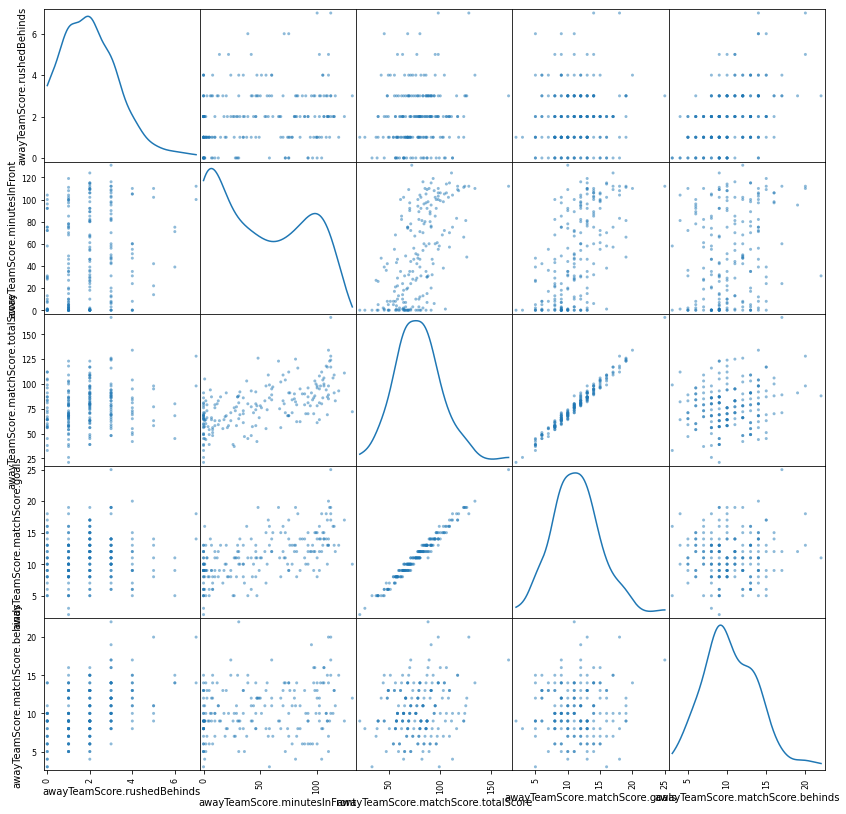

In [230]:
scatter_matrix(df_all[df_all.iloc[:,50:56].columns], diagonal='kde', figsize=(14,14));

In [231]:
# HTGDIFF: Home Team Goal Difference
# ATGDIFF: Away Team Goal Difference

df_all['HTGDIFF'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']
df_all['ATGDIFF'] = df_all['awayTeamScore.matchScore.goals'] - df_all['homeTeamScore.matchScore.goals']

## Calculate AVG goal difference for home and away team rolling 4 Games

In [232]:
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(4).mean()
        df_team[avg_h_a_diff] = result
        avg_per_team[t] = df_team
    return avg_per_team

In [233]:
d_AVGFTHG = avg_goal_diff(df_all, 'AVGHTGDIFF', 'match.homeTeam.name', 'H')

In [234]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = pd.concat([df,v])
    return df

In [235]:
df_AVGFTHG = from_dict_value_to_df(d_AVGFTHG)
df_AVGFTHG.sort_index(inplace=True)

In [236]:
d_AVGFTAG = avg_goal_diff(df_AVGFTHG, 'AVGATGDIFF', 'match.awayTeam.name', 'A')
df_all = from_dict_value_to_df(d_AVGFTAG)
df_all.sort_index(inplace=True)
df_all['AVGATGDIFF'].fillna(0, inplace=True)

## Add per match game results from last three games

In [237]:
df_all['goal_diff'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']


for index, row in df_all[df_all['match.status']=='CONCLUDED'].iterrows():
    if df_all['goal_diff'][index] > 0:
        df_all.at[index,'result'] = 3   # 3 is a win
    elif df_all['goal_diff'][index] == 0:
        df_all.at[index,'result'] = 2  # 2 is a draw
    else:
        df_all.at[index,'result'] = 1  # 1 is a result 

In [238]:
df_all.head()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGATGDIFF,goal_diff,result
0,Richmond Vs Carlton,2021-03-18 08:25:00,CONCLUDED,CD_M20210140101,CD_V40,2021-03-18T08:25:00,CD_T120,CD_T30,CD_R202101401,2021-03-18T19:25:00,...,0,3,2,0,4,-4,0.0,0.0,4,3.0
1,Collingwood Vs Western Bulldogs,2021-03-19 08:50:00,CONCLUDED,CD_M20210140102,CD_V40,2021-03-19T08:50:00,CD_T40,CD_T140,CD_R202101401,2021-03-19T19:50:00,...,0,0,3,0,-3,3,0.0,0.0,-3,1.0
2,Melbourne Vs Fremantle,2021-03-20 02:45:00,CONCLUDED,CD_M20210140103,CD_V40,2021-03-20T02:45:00,CD_T90,CD_T60,CD_R202101401,2021-03-20T13:45:00,...,0,0,1,0,3,-3,0.0,0.0,3,3.0
3,Adelaide Crows Vs Geelong Cats,2021-03-20 05:35:00,CONCLUDED,CD_M20210140104,CD_V6,2021-03-20T05:35:00,CD_T10,CD_T70,CD_R202101401,2021-03-20T16:05:00,...,1,1,2,0,2,-2,0.0,0.0,2,3.0
4,Essendon Vs Hawthorn,2021-03-20 08:25:00,CONCLUDED,CD_M20210140105,CD_V190,2021-03-20T08:25:00,CD_T50,CD_T80,CD_R202101401,2021-03-20T19:25:00,...,0,1,2,0,-1,1,0.0,0.0,-1,1.0


In [239]:
def previous_data(df, h_or_a_team, column, letter, past_n):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, past_n):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}_{}'.format(letter, column, i)] = d[i].result
    return team_with_past_dict

In [240]:
def previous_data_call(df, side, column, letter, iterations):
    d = previous_data(df, side, column, letter, iterations)
    df_result= from_dict_value_to_df(d)
    df_result.sort_index(inplace=True)
    return df_result

In [241]:
df_last_home_results = previous_data_call(df_all, 'match.homeTeam.name', 'result', 'H', 3)
df_last_away_results = previous_data_call(df_last_home_results, 'match.awayTeam.name', 'result', 'A', 3)

In [242]:
df_last_last_HTGDIFF_results = previous_data_call(df_last_away_results, 'match.homeTeam.name', 'HTGDIFF', 'H', 3)
df_last_last_ATGDIFF_results = previous_data_call(df_last_last_HTGDIFF_results, 'match.awayTeam.name', 'ATGDIFF', 'A', 3)

In [243]:
df_last_AVGFTHG_results = previous_data_call(df_last_last_ATGDIFF_results, 'match.homeTeam.name', 'AVGHTGDIFF', 'H', 2)
df_last_AVGFTAG_results = previous_data_call(df_last_AVGFTHG_results, 'match.awayTeam.name', 'AVGATGDIFF', 'A', 2)

In [244]:
df_all = df_last_AVGFTAG_results.copy()

In [245]:
df_all.shape

(198, 91)

In [246]:
df_all

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,H_result_1,H_result_2,A_result_1,A_result_2,H_HTGDIFF_1,H_HTGDIFF_2,A_ATGDIFF_1,A_ATGDIFF_2,H_AVGHTGDIFF_1,A_AVGATGDIFF_1
0,Richmond Vs Carlton,2021-03-18 08:25:00,CONCLUDED,CD_M20210140101,CD_V40,2021-03-18T08:25:00,CD_T120,CD_T30,CD_R202101401,2021-03-18T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Collingwood Vs Western Bulldogs,2021-03-19 08:50:00,CONCLUDED,CD_M20210140102,CD_V40,2021-03-19T08:50:00,CD_T40,CD_T140,CD_R202101401,2021-03-19T19:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Melbourne Vs Fremantle,2021-03-20 02:45:00,CONCLUDED,CD_M20210140103,CD_V40,2021-03-20T02:45:00,CD_T90,CD_T60,CD_R202101401,2021-03-20T13:45:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adelaide Crows Vs Geelong Cats,2021-03-20 05:35:00,CONCLUDED,CD_M20210140104,CD_V6,2021-03-20T05:35:00,CD_T10,CD_T70,CD_R202101401,2021-03-20T16:05:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Essendon Vs Hawthorn,2021-03-20 08:25:00,CONCLUDED,CD_M20210140105,CD_V190,2021-03-20T08:25:00,CD_T50,CD_T80,CD_R202101401,2021-03-20T19:25:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Geelong Cats Vs Melbourne,2021-08-21 09:25:00,CONCLUDED,CD_M20210142305,CD_V30,2021-08-21T09:25:00,CD_T70,CD_T90,CD_R202101423,2021-08-21T19:25:00,...,3.0,1.0,1.0,1.0,2.0,-5.0,1.0,14.0,2.75,5.00
194,Carlton Vs GWS Giants,2021-08-21 09:40:00,CONCLUDED,CD_M20210142303,CD_V190,2021-08-21T09:40:00,CD_T30,CD_T1010,CD_R202101423,2021-08-21T19:40:00,...,1.0,1.0,1.0,1.0,-3.0,-7.0,5.0,2.0,-3.25,2.25
195,St Kilda Vs Fremantle,2021-08-22 02:15:00,CONCLUDED,CD_M20210142307,CD_V2,2021-08-22T02:15:00,CD_T130,CD_T60,CD_R202101423,2021-08-22T12:15:00,...,3.0,1.0,3.0,1.0,4.0,-6.0,-6.0,10.0,-1.25,-0.75
196,Essendon Vs Collingwood,2021-08-22 05:20:00,CONCLUDED,CD_M20210142304,CD_V40,2021-08-22T05:20:00,CD_T50,CD_T40,CD_R202101423,2021-08-22T15:20:00,...,1.0,1.0,3.0,3.0,-1.0,-2.0,-14.0,-3.0,1.25,-4.75


In [247]:
df_matches_numeric = df_all._get_numeric_data()


In [248]:
df_matches_numeric.columns

Index(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'venue.capacity',
       'venue.groundDimension', 'venue.latitude', 'venue.longitude',
       'round.year', 'round.roundNumber', 'scoreWorm', 'scoreMap',
       'homeTeamScore.rushedBehinds', 'homeTeamScore.minutesInFront',
       'homeTeamScore.matchScore.totalScore', 'homeTeamScore.matchScore.goals',
       'homeTeamScore.matchScore.behinds',
       'homeTeamScore.matchScore.superGoals', 'awayTeamScore.rushedBehinds',
       'awayTeamScore.minutesInFront', 'awayTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.goals', 'awayTeamScore.matchScore.behinds',
       'awayTeamScore.matchScore.superGoals', 'weather.tempInCelsius',
       'homeTeamScoreChart.goals', 'homeTeamScoreChart.leftBehinds',
       'homeTeamScoreChart.rightBehinds', 'homeTeamScoreChart.leftPosters',
       'homeTeamScoreChart.rightPosters', 'homeTeamScoreChart.rushedBehinds',
       'homeTeamScoreChart.touchedBehinds', 'awayTeamScoreChart.go

In [249]:
df_matches_numeric.drop(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'goal_diff', 'result', 'homeTeamScore.matchScore.goals', 'awayTeamScore.matchScore.goals'], axis=1, inplace=True)
df_matches_numeric.isnull().sum(axis = 0)

venue.capacity                          0
venue.groundDimension                   0
venue.latitude                          0
venue.longitude                         0
round.year                              0
round.roundNumber                       0
scoreWorm                               0
scoreMap                                0
homeTeamScore.rushedBehinds             0
homeTeamScore.minutesInFront            0
homeTeamScore.matchScore.totalScore     0
homeTeamScore.matchScore.behinds        0
homeTeamScore.matchScore.superGoals     0
awayTeamScore.rushedBehinds             0
awayTeamScore.minutesInFront            0
awayTeamScore.matchScore.totalScore     0
awayTeamScore.matchScore.behinds        0
awayTeamScore.matchScore.superGoals     0
weather.tempInCelsius                   0
homeTeamScoreChart.goals                0
homeTeamScoreChart.leftBehinds          0
homeTeamScoreChart.rightBehinds         0
homeTeamScoreChart.leftPosters          0
homeTeamScoreChart.rightPosters   

In [250]:
df_norm = (df_matches_numeric - df_matches_numeric.min()) / (df_matches_numeric.max() - df_matches_numeric.min())

In [251]:
df_norm.columns

Index(['venue.capacity', 'venue.groundDimension', 'venue.latitude',
       'venue.longitude', 'round.year', 'round.roundNumber', 'scoreWorm',
       'scoreMap', 'homeTeamScore.rushedBehinds',
       'homeTeamScore.minutesInFront', 'homeTeamScore.matchScore.totalScore',
       'homeTeamScore.matchScore.behinds',
       'homeTeamScore.matchScore.superGoals', 'awayTeamScore.rushedBehinds',
       'awayTeamScore.minutesInFront', 'awayTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.behinds',
       'awayTeamScore.matchScore.superGoals', 'weather.tempInCelsius',
       'homeTeamScoreChart.goals', 'homeTeamScoreChart.leftBehinds',
       'homeTeamScoreChart.rightBehinds', 'homeTeamScoreChart.leftPosters',
       'homeTeamScoreChart.rightPosters', 'homeTeamScoreChart.rushedBehinds',
       'homeTeamScoreChart.touchedBehinds', 'awayTeamScoreChart.goals',
       'awayTeamScoreChart.leftBehinds', 'awayTeamScoreChart.rightBehinds',
       'awayTeamScoreChart.leftPosters', 'awayT

In [252]:
predictable_columns = [
       'venue.capacity', 'venue.groundDimension', 'venue.latitude',
       'venue.longitude', 'round.year', 'round.roundNumber', 'scoreWorm',
       'scoreMap', 'homeTeamScore.rushedBehinds',
       'homeTeamScore.minutesInFront', 'homeTeamScore.matchScore.totalScore',
       'homeTeamScore.matchScore.behinds',
       'homeTeamScore.matchScore.superGoals', 'awayTeamScore.rushedBehinds',
       'awayTeamScore.minutesInFront', 'awayTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.behinds',
       'awayTeamScore.matchScore.superGoals', 'weather.tempInCelsius',
       'homeTeamScoreChart.goals', 'homeTeamScoreChart.leftBehinds',
       'homeTeamScoreChart.rightBehinds', 'homeTeamScoreChart.leftPosters',
       'homeTeamScoreChart.rightPosters', 'homeTeamScoreChart.rushedBehinds',
       'homeTeamScoreChart.touchedBehinds', 'awayTeamScoreChart.goals',
       'awayTeamScoreChart.leftBehinds', 'awayTeamScoreChart.rightBehinds',
       'awayTeamScoreChart.leftPosters', 'awayTeamScoreChart.rightPosters',
       'awayTeamScoreChart.rushedBehinds', 'awayTeamScoreChart.touchedBehinds',
       'HTGDIFF', 'ATGDIFF', 'AVGHTGDIFF', 'AVGATGDIFF', 'H_result_1',
       'H_result_2', 'A_result_1', 'A_result_2', 'H_HTGDIFF_1', 'H_HTGDIFF_2',
       'A_ATGDIFF_1', 'A_ATGDIFF_2', 'H_AVGHTGDIFF_1', 'A_AVGATGDIFF_1'
]

In [253]:
df_X = df_norm[predictable_columns]

In [254]:
df_X.fillna(0,inplace=True)

In [255]:
# Normal Rounds have 9 games
# Round 24 has 4 games
# Round 25 and 26 have 2 games
# Round 27 has 1 game

# + 9 per match day for normal rounds
int_for_test = 198
int_for_prediction = int_for_test - 9




In [256]:
df_all.shape

(198, 91)

In [257]:
X = df_X.iloc[:int_for_prediction,:]
Y = df_all.iloc[:int_for_prediction,:]['result']
Z = df_X.iloc[int_for_prediction:,:]

In [258]:
Z

,venue.capacity,venue.groundDimension,venue.latitude,venue.longitude,round.year,round.roundNumber,scoreWorm,scoreMap,homeTeamScore.rushedBehinds,homeTeamScore.minutesInFront,...,H_result_1,H_result_2,A_result_1,A_result_2,H_HTGDIFF_1,H_HTGDIFF_2,A_ATGDIFF_1,A_ATGDIFF_2,H_AVGHTGDIFF_1,A_AVGATGDIFF_1
189,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.742188,...,0.0,1.0,0.5,0.0,0.472222,0.750000,0.444444,0.555556,0.652174,0.790323
190,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.132812,...,1.0,1.0,1.0,0.0,0.694444,0.638889,0.361111,0.472222,0.550725,0.709677
191,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.166667,0.921875,...,1.0,1.0,0.0,1.0,0.722222,0.972222,0.527778,0.250000,0.782609,0.548387
192,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.976562,...,1.0,1.0,1.0,1.0,0.944444,0.750000,0.361111,0.222222,0.869565,0.274194
193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.671875,...,1.0,0.0,0.0,0.0,0.611111,0.416667,0.472222,0.833333,0.724638,0.919355
194,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.429688,...,0.0,0.0,0.0,0.0,0.472222,0.361111,0.583333,0.500000,0.376812,0.741935
195,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.843750,...,1.0,0.0,1.0,0.0,0.666667,0.388889,0.277778,0.722222,0.492754,0.548387
196,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.812500,...,0.0,0.0,1.0,1.0,0.527778,0.500000,0.055556,0.361111,0.637681,0.290323
197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.804688,...,0.5,1.0,1.0,0.0,0.555556,0.638889,0.305556,0.638889,0.391304,0.580645


In [259]:
df_next_games_teams = df_all.iloc[int_for_prediction:,:][['match.homeTeam.name', 'match.awayTeam.name']]

In [260]:
df_next_games_teams

,match.homeTeam.name,match.awayTeam.name
189,Western Bulldogs,Port Adelaide
190,Richmond,Hawthorn
191,Sydney Swans,Gold Coast Suns
192,Brisbane Lions,West Coast Eagles
193,Geelong Cats,Melbourne
194,Carlton,GWS Giants
195,St Kilda,Fremantle
196,Essendon,Collingwood
197,Adelaide Crows,North Melbourne


In [261]:
X.to_pickle("pickle_files/X.pkl")
Y.to_pickle("pickle_files/Y.pkl")
Z.to_pickle("pickle_files/Z.pkl")
df_next_games_teams.to_pickle("pickle_files/next_games.pkl")

In [265]:
df_all[['match.name','result']].tail(9)

,match.name,result
189,Western Bulldogs Vs Port Adelaide,3.0
190,Richmond Vs Hawthorn,2.0
191,Sydney Swans Vs Gold Coast Suns,3.0
192,Brisbane Lions Vs West Coast Eagles,3.0
193,Geelong Cats Vs Melbourne,2.0
194,Carlton Vs GWS Giants,1.0
195,St Kilda Vs Fremantle,3.0
196,Essendon Vs Collingwood,3.0
197,Adelaide Crows Vs North Melbourne,3.0
